<a href="https://colab.research.google.com/github/NebojsaIvancevic/CNN-dogbreedclassifier/blob/main/Deep_learning_with_python%2C_tensorflow_and_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [8]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

# So the x_train data is the "features." In this case, the features are pixel values of the 28x28 images of these digits 0-9.
# The y_train is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9?)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# It's generally a good idea to "normalize" your data.
# This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1. In our case, each "pixel" is a feature,
# and each feature currently ranges from 0 to 255. Not quite 0 to 1. Let's change that with a handy utility function:

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# Build the model
# A sequential model is what you're going to use most of the time. It just means things are going to go in direct order. A feed forward model. No going backwards...for now.

#Now, we'll pop in layers. Recall our neural network image? Was the input layer flat, or was it multi-dimensional? It was flat. So, we need to take this 28x28 image, and make it a flat 1x784. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer # 128 units(neurons), activation function is what makes the neuron fire step function sigmoid etc
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer # rectified linear relu

# This is our final layer. It has 10 nodes. 1 node per possible number prediction. 
# In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is. Great, our model is done.

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer IN CASE OF CLASSIFICATION will have number of classes # softmax for probability distribution

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2632 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1100 - accuracy: 0.9661
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0757 - accuracy: 0.9760


In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1066 - accuracy: 0.9696
0.10657177865505219 0.9696000218391418


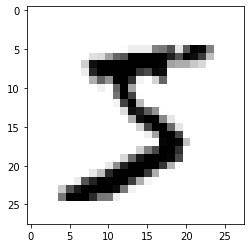

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary) # cmap - color map transforms the image into specific color set (binary for black and white)
#print(x_train[0])  # tensor - multidimensional array of components

In [10]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [11]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [12]:
predictions = new_model.predict([x_test])

In [13]:
print(predictions)

[[3.5419880e-08 1.2738735e-06 1.9020416e-06 ... 9.9977106e-01
  6.4250621e-08 4.8675643e-06]
 [2.3338603e-07 1.5286780e-05 9.9998355e-01 ... 2.4377247e-10
  5.9208189e-09 1.2738099e-12]
 [1.0863032e-06 9.9979752e-01 1.2833283e-04 ... 4.1708372e-05
  6.4633796e-06 4.6741235e-07]
 ...
 [1.6293209e-09 1.1841766e-07 2.1380460e-08 ... 1.8035440e-05
  1.2028363e-07 1.2933275e-04]
 [6.8615577e-06 1.7973055e-07 1.1936780e-07 ... 1.9337472e-06
  3.2763628e-04 2.1053477e-08]
 [5.9991603e-06 8.3022869e-09 4.5367784e-07 ... 1.5479371e-10
  4.2075428e-07 4.1313863e-09]]


In [14]:
# That sure doesn't start off as helpful, but recall these are probability distributions. We can get the actual number pretty simply
import numpy as np
print(np.argmax(predictions[0]))

7


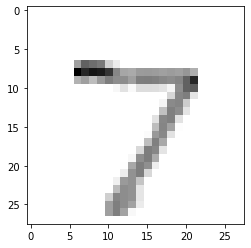

In [16]:
plt.imshow(x_test[0], cmap= plt.cm.binary)
plt.show()